<a href="https://colab.research.google.com/github/AndreiKwok/ML/blob/Develop/neural_network_dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets,transforms
from torch import nn, optim
from time import time

In [15]:
transform = transforms.ToTensor()
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform) #Download the part of dataset train
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # create a buffer to get the data's by part

valset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

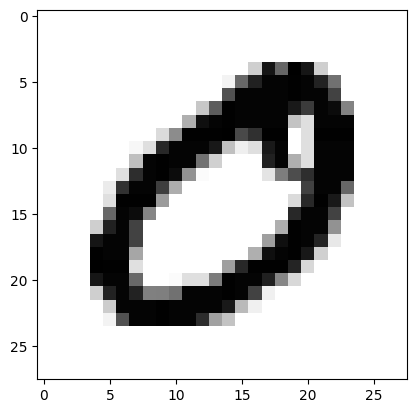

In [16]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


In [17]:
print(type(images))
print(images[0].shape)
print(labels[0].shape)

<class 'torch.Tensor'>
torch.Size([1, 28, 28])
torch.Size([])


In [18]:
class Model(nn.Module):
  def __init__(self) -> None:
    super(Model,self).__init__()
    self.liner1 = nn.Linear(28*28, 128) #Layer of entrance, 784 neurons that connect to 128
    self.liner2 = nn.Linear(128,64) #intern layer 1, 128 neurons that connect to 64
    self.liner3 = nn.Linear(64,10) # same, but 64 neurons connect with to 10
    return
  def forward(self,x):
    x = F.relu(self.liner1(x)) # activate function of layer entrance to intern layer 1
    x = F.relu(self.liner2(x)) # same, but inter layer 1 to  layer 2
    x = self.liner3(x) #and here intern layer 2 to exit layer, this case f(x) = x
    return F.log_softmax(x, dim=1)


In [19]:
def validate(model, valloader, device):
    correct_count, total_count = 0, 0
    for images, labels in valloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            # Disable autograd to speed up validation.
            # Dynamic computation graphs are computationally expensive.
            with torch.no_grad():
                logps = model(img.to(device))  # Model output in log scale

            ps = torch.exp(logps)  # Convert output to normal scale (it's a tensor)
            probabilities = list(ps.cpu().numpy()[0])
            predicted_label = probabilities.index(max(probabilities))  # convert the tensor in a number, in this case the number that the model predict as correct
            true_label = labels.numpy()[i]

            if true_label == predicted_label:  # Compare prediction with the true value
                correct_count += 1
            total_count += 1

    print("Total images tested =", total_count)
    print("\nModel accuracy = {}%".format(correct_count * 100 / total_count))


In [20]:
model = Model()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")#cuda is version
model.to(device)

Model(
  (liner1): Linear(in_features=784, out_features=128, bias=True)
  (liner2): Linear(in_features=128, out_features=64, bias=True)
  (liner3): Linear(in_features=64, out_features=10, bias=True)
)